In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import json
import folium
import seaborn as sns

In [2]:
인구분포도25 = pd.read_csv("output/인구분포도_25.csv")
인구분포도25 = 인구분포도25.iloc[:, range(1,6)]
인구분포도25.head()

gid     val                                           geometry  \
0  다사352458  5379.0  MULTIPOLYGON (((126.7668012200386 37.509204896...   
1  다사337441  4169.0  MULTIPOLYGON (((126.7499836264003 37.493776418...   
2  다사349459  3789.0  MULTIPOLYGON (((126.7633981804139 37.510085069...   
3  다사347458  3438.0  MULTIPOLYGON (((126.7611442510921 37.509169646...   
4  다사352450  3211.0  MULTIPOLYGON (((126.7668717360636 37.501994562...   

           경도         위도  
0  126.767363  37.509659  
1  126.750545  37.494231  
2  126.763959  37.510539  
3  126.761706  37.509624  
4  126.767433  37.502449

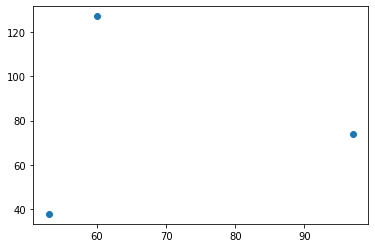

In [3]:
plt.scatter([60,97,53], [127, 74, 38])

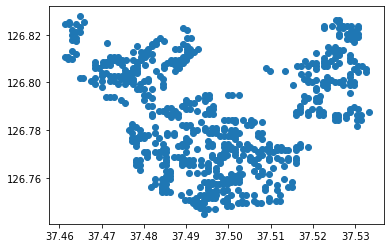

In [4]:
plt.scatter(인구분포도25['위도'], 인구분포도25['경도'])

In [5]:
kmeans = KMeans(init = 'random', n_clusters = 50)
kmeans.fit(인구분포도25[['위도', '경도']])
y_pred = kmeans.predict(인구분포도25[['위도', '경도']])

In [6]:
pd.DataFrame(인구분포도25['위도'])

위도
0    37.509659
1    37.494231
2    37.510539
3    37.509624
4    37.502449
..         ...
634  37.525092
635  37.504293
636  37.478107
637  37.496076
638  37.479092

[639 rows x 1 columns]

In [7]:
pd.DataFrame(인구분포도25['경도'])

경도
0    126.767363
1    126.750545
2    126.763959
3    126.761706
4    126.767433
..          ...
634  126.785319
635  126.774203
636  126.766540
637  126.757314
638  126.780102

[639 rows x 1 columns]

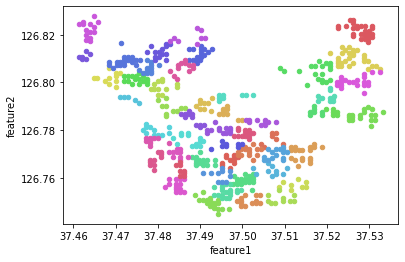

In [63]:
color = sns.color_palette('hls', 50)
colors = color.as_hex()
kmeans = KMeans(init = 'random', n_clusters = 50)
kmeans.fit(인구분포도25[['위도', '경도']])
y_pred = kmeans.predict(인구분포도25[['위도', '경도']])

merge_data = pd.concat([pd.DataFrame(인구분포도25['위도']), pd.DataFrame(인구분포도25['경도']), pd.DataFrame(y_pred)], axis = 1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax = None
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = color[i],
                          ax = ax)

In [64]:
total = pd.concat([pd.DataFrame(인구분포도25['val']),
                   pd.DataFrame(인구분포도25['위도']),
                   pd.DataFrame(인구분포도25['경도']),
                   pd.DataFrame(y_pred)], axis = 1)
print(len(total))
total.head()

639


val         위도          경도   0
0  5379.0  37.509659  126.767363  28
1  4169.0  37.494231  126.750545  13
2  3789.0  37.510539  126.763959  27
3  3438.0  37.509624  126.761706  27
4  3211.0  37.502449  126.767433   2

In [65]:
total.to_csv('output/k-mean.csv')

In [54]:
# 부천 지도 만들기
geo_data = "data/HangJeongDong_bucheon2.json"

with open(geo_data,encoding="utf-8") as f:
    geo_data = json.loads(f.read())

bucheon_map = folium.Map(location=[37.50554861215234,126.77550612183495], zoom_start=13)

for i in range(50):
    j = i + 1
    for name, lat, lng in zip(total[total[0] == j].val, total[total[0] == j].위도, total[total[0] == j].경도):
        folium.CircleMarker([lat, lng],
                            radius=4,         # 원의 반지름
                            fill=True,
                            color = colors[49-i],   # 테두리 색
                            fill_color= colors[i],    # 원을 채우는 색
                            fill_opacity=0.7, # 투명도    
                            popup=name
        ).add_to(bucheon_map)
    
fmap=folium.Choropleth(geo_data = geo_data,
                       color = "black",
                       nan_fill_color='black',
                       fill_opacity=0.1,
                       fill_color = None).add_to(bucheon_map)

display(bucheon_map)

bucheon_map.save('output/k-mean1.html')

In [55]:
color = sns.color_palette('hls', 45)
colors = color.as_hex()
kmeans = KMeans(init = 'random', n_clusters = 45)
kmeans.fit(인구분포도25[['위도', '경도']])
y_pred = kmeans.predict(인구분포도25[['위도', '경도']])

total = pd.concat([pd.DataFrame(인구분포도25['val']),
                   pd.DataFrame(인구분포도25['위도']),
                   pd.DataFrame(인구분포도25['경도']),
                   pd.DataFrame(y_pred)], axis = 1)
print(len(total))

639


In [57]:
# 부천 지도 만들기
geo_data = "data/HangJeongDong_bucheon2.json"

with open(geo_data,encoding="utf-8") as f:
    geo_data = json.loads(f.read())

bucheon_map = folium.Map(location=[37.50554861215234,126.77550612183495], zoom_start=13)

for i in range(50):
    j = i + 1
    for name, lat, lng in zip(total[total[0] == j].val, total[total[0] == j].위도, total[total[0] == j].경도):
        folium.CircleMarker([lat, lng],
                            radius=4.5,         # 원의 반지름
                            fill=True,
                            color = colors[44-i],   # 테두리 색
                            fill_color= colors[i],    # 원을 채우는 색
                            fill_opacity=0.7, # 투명도    
                            popup=name
        ).add_to(bucheon_map)
    
fmap=folium.Choropleth(geo_data = geo_data,
                       color = "black",
                       nan_fill_color='black',
                       fill_opacity=0.1,
                       fill_color = None).add_to(bucheon_map)

display(bucheon_map)

bucheon_map.save('output/k-mean2.html')

In [58]:
color = sns.color_palette('hls', 40)
colors = color.as_hex()
kmeans = KMeans(init = 'random', n_clusters = 40)
kmeans.fit(인구분포도25[['위도', '경도']])
y_pred = kmeans.predict(인구분포도25[['위도', '경도']])

total = pd.concat([pd.DataFrame(인구분포도25['val']),
                   pd.DataFrame(인구분포도25['위도']),
                   pd.DataFrame(인구분포도25['경도']),
                   pd.DataFrame(y_pred)], axis = 1)
print(len(total))

639


In [59]:
# 부천 지도 만들기
geo_data = "data/HangJeongDong_bucheon2.json"

with open(geo_data,encoding="utf-8") as f:
    geo_data = json.loads(f.read())

bucheon_map = folium.Map(location=[37.50554861215234,126.77550612183495], zoom_start=13)

for i in range(50):
    j = i + 1
    for name, lat, lng in zip(total[total[0] == j].val, total[total[0] == j].위도, total[total[0] == j].경도):
        folium.CircleMarker([lat, lng],
                            radius=4.5,         # 원의 반지름
                            fill=True,
                            color = colors[39-i],   # 테두리 색
                            fill_color= colors[i],    # 원을 채우는 색
                            fill_opacity=0.7, # 투명도    
                            popup=name
        ).add_to(bucheon_map)
    
fmap=folium.Choropleth(geo_data = geo_data,
                       color = "black",
                       nan_fill_color='black',
                       fill_opacity=0.1,
                       fill_color = None).add_to(bucheon_map)

display(bucheon_map)

bucheon_map.save('output/k-mean3.html')

In [60]:
color = sns.color_palette('hls', 35)
colors = color.as_hex()
kmeans = KMeans(init = 'random', n_clusters = 35)
kmeans.fit(인구분포도25[['위도', '경도']])
y_pred = kmeans.predict(인구분포도25[['위도', '경도']])

total = pd.concat([pd.DataFrame(인구분포도25['val']),
                   pd.DataFrame(인구분포도25['위도']),
                   pd.DataFrame(인구분포도25['경도']),
                   pd.DataFrame(y_pred)], axis = 1)
print(len(total))

639


In [62]:
# 부천 지도 만들기
geo_data = "data/HangJeongDong_bucheon2.json"

with open(geo_data,encoding="utf-8") as f:
    geo_data = json.loads(f.read())

bucheon_map = folium.Map(location=[37.50554861215234,126.77550612183495], zoom_start=13)

for i in range(50):
    j = i + 1
    for name, lat, lng in zip(total[total[0] == j].val, total[total[0] == j].위도, total[total[0] == j].경도):
        folium.CircleMarker([lat, lng],
                            radius=4.5,         # 원의 반지름
                            fill=True,
                            color = colors[34-i],   # 테두리 색
                            fill_color= colors[i],    # 원을 채우는 색
                            fill_opacity=0.7, # 투명도    
                            popup=name
        ).add_to(bucheon_map)
    
fmap=folium.Choropleth(geo_data = geo_data,
                       color = "black",
                       nan_fill_color='black',
                       fill_opacity=0.1,
                       fill_color = None).add_to(bucheon_map)

display(bucheon_map)

bucheon_map.save('output/k-mean4.html')